# Exploratory Data Analysis of Health Dataset
----------
This is a health dataset, each row represent a person and their corresponding features like age, height, weight, blood pressure, cholesterol level e.t.c.

### Features
1. `id`- unique key per person
2. `age`- calculated in days
3. `gender`:  `1`- female and `2`- male
4. `height`- height of a person (cm)
5. `weight`- weight of a person (kg)
6. `ap_hi`- Systolic blood pressure (mmHg)
7. `ap_lo`- Diastolic blood pressure (mmHg)
8. `cholesterol`- level of cholesterol| `1`- normal | `2`- above normal | `3`- well above norrmal
9. `smoke`: `0`- no and `1`- yes

In [1]:
# import all required libaries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
cardio_df = pd.read_csv("cardio_base.csv")
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [3]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [4]:
cardio_shape = cardio_df.shape
print(f"There are {cardio_shape[0]} observations and {cardio_shape[1]} features in the dataset.")

There are 70000 observations and 9 features in the dataset.


In [5]:
# descriptive statistics
cardio_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [6]:
cardio_df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
smoke              2
dtype: int64

In [7]:
# Check for duplicates
cardio_df.duplicated().sum()

0

In [8]:
# Check for null columns
cardio_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

 Exploratory Data Analysis and Data Cleaning
 -----

In [9]:
# close observation of the age
cardio_df["age"].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

* the `age` column was measured in days, hence we need to convert each row to years

In [10]:
# we are going to calculate age in years rounded down
cardio_df["age"]= (cardio_df["age"]/ 365.25).astype(int)
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0


In [11]:
# the age groups within the dataset
cardio_df.age.unique()

array([50, 55, 51, 48, 47, 59, 60, 61, 54, 40, 39, 45, 58, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 41, 44, 29, 30])

In [12]:
youngest = cardio_df["age"].min()
print(f"The yongest person in the dataset is:", youngest, "years old")

The yongest person in the dataset is: 29 years old


In [13]:
oldest = cardio_df["age"].max()
print(f"The oldest person in the dataset is:", oldest, "years old")

The oldest person in the dataset is: 64 years old


* After evaluating the age distribution, we can deduce that the dataset consist of adults ONLY.

<function matplotlib.pyplot.show(close=None, block=None)>

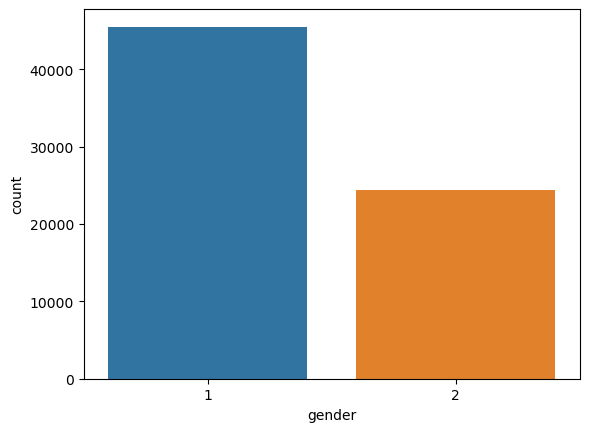

In [14]:
sns.countplot(x="gender", data=cardio_df)
plt.show

* We can observe that females `1` are highly represented in the dataset compared to male `2`

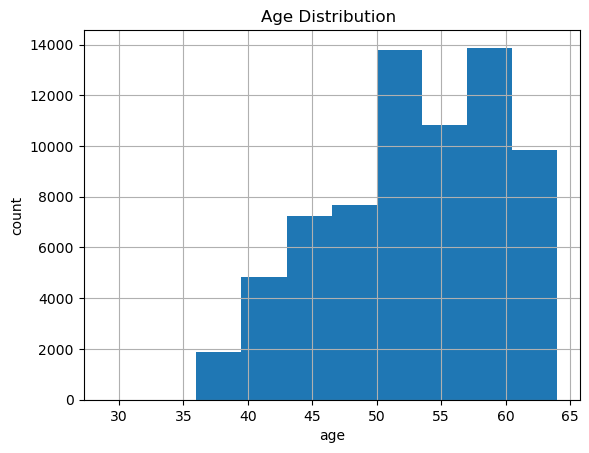

In [15]:
# Distribution of 'age' across the dataset
cardio_df["age"].hist()
plt.title("Age Distribution ")
plt.ylabel("count")
plt.xlabel("age")
plt.show()

* We can see that the dataset is right-skewed, the majority are within age 50 to 60

In [16]:
# Calculate the median age
cardio_df["age"].median()

53.0

In [17]:
# Calculate the mean age
cardio_df["age"].mean()

52.80325714285714

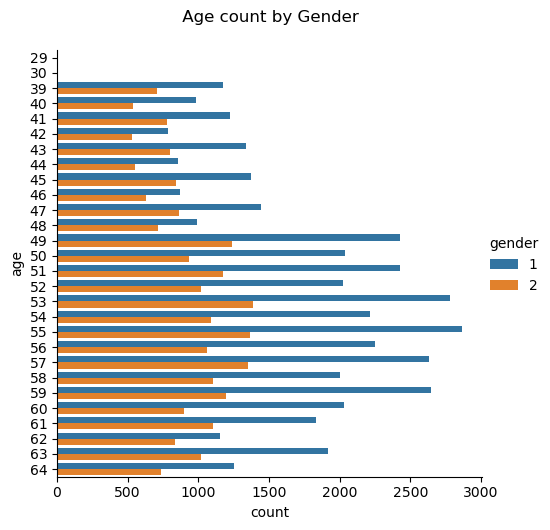

In [18]:
# Create a chart showing the count of gender per age group
g=sns.catplot(y="age", kind="count", data=cardio_df, hue="gender", ci=None)
g.fig.suptitle(" Age count by Gender", y=1.05)
plt.show()

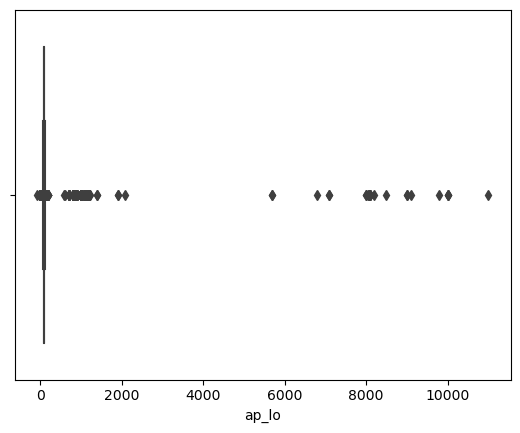

In [19]:
# examine the distribution of `ap_lo` feature
sns.boxplot(x="ap_lo", data=cardio_df)
plt.show()

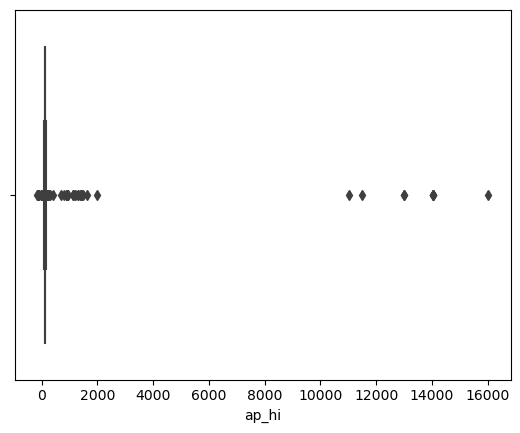

In [20]:
# Examine the distribution of the `ap_hi` feature in the dataset
sns.boxplot(x="ap_hi", data=cardio_df)
plt.show()

* there are a number of extreme values (outliers) here, most of which are adnormal blood pressure as humans
* having `ap_lo` and `ap_hi` levels lower than 0 and as high as 10,000

> Diastolic blood pressure `ap_lo` exerts within arteries between heartbeats. Normal diastolic blood pressure is 80 mmHg or below. If you have high blood pressure, the diastolic number is often higher even during rest. Diastolic blood pressure is considered dangerously low when it is 60 mmHg or lower and dangerously high when it is 110 mmHg or over. Reference: [verywell_health](https://www.verywellhealth.com/systolic-and-diastolic-blood-pressure-1746075)

> Systolic blood pressure `ap_hi` exerts when blood is ejected into arteries. Normal systolic blood pressure is 120 mmHg or below. `ap_hi` below 90 mmHg is considered low and may require intervention and management from your healthcare provider. If you get `ap_hi` readings above 180 mmHg, it is considered dangerously high and should be addressed by your healthcare provider. Reference: [verywell health](https://www.verywellhealth.com/systolic-and-diastolic-blood-pressure-1746075)

Taking into account the above statement, we may have to drop those extreme values using a custom upper and lower limits which will include patients with hypotension and hypertension crisis within the dataset.
#### Requirement to drop outliers
- the percentage of the outliers must be 5% or lesser of the entire dataset
- hence, our threshold should be <= 5% of `cardio_df`

In [21]:
# Calculate the threshold of `ap_hi` data below 70 and above 200
ap_hi_outliers = (cardio_df["ap_hi"] < 70 ) | (cardio_df["ap_hi"] > 200)
threshold = cardio_df[ap_hi_outliers]["ap_hi"].count() / cardio_df["ap_hi"].count() * 100
print(f"The ap_hi threshold is:", threshold)

The ap_hi threshold is: 0.41285714285714287


- Since only 0.4% of our data is affected, it is safe to drop those data.

In [22]:
# Calculate the threshold of `ap_lo` data below 40 and above 140
ap_lo_outliers = (cardio_df["ap_lo"] < 40 ) | (cardio_df["ap_lo"] > 140 )
threshold1 = cardio_df[ap_lo_outliers]["ap_lo"].count() / cardio_df["ap_lo"].count() * 100
print(f"The ap_lo threshold is:", threshold1)

The ap_lo threshold is: 1.5342857142857143


* Since the `ap_lo` outlier is 1.5% which is lower than our threshold, it is also safe to drop them

In [23]:
# Drop ap_hi outliers
cardio_df.drop(cardio_df[ap_hi_outliers].index, inplace = True)

# Drop ap_lo outliers
cardio_df.drop(cardio_df[ap_lo_outliers].index, inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_15812\2217526957.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cardio_df.drop(cardio_df[ap_lo_outliers].index, inplace = True)


In [24]:
cardio_df.shape

(68669, 9)

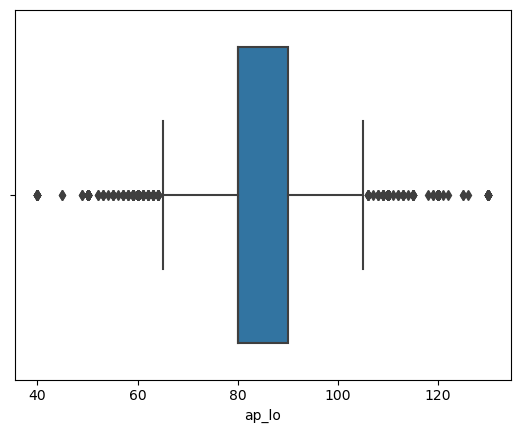

In [25]:
# A proper distribution chart of the `ap_lo` feature excluding its outliers
sns.boxplot(x="ap_lo", data=cardio_df)
plt.show()

* The normal range for diastolic blood pressure `api_lo` in adult is typically considered to be between 60 and 80 mmHg

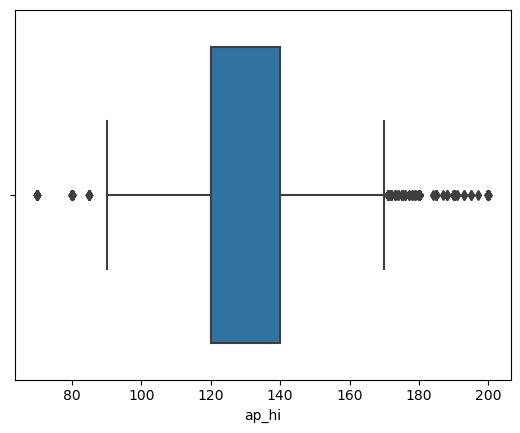

In [26]:
sns.boxplot(x="ap_hi", data=cardio_df)
plt.show()

* The normal range for systolic blood pressure `ap_hi` in adults is typically considered to be between 90 and 120mmHg

In [67]:
# let's look at those with hypertension`
hypertension = cardio_df[(cardio_df["ap_hi"]>130) | (cardio_df["ap_lo"]>90)]
hypertension.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
1,1,55,1,156,85.0,140,90,3,0
3,3,48,2,169,82.0,150,100,1,0
22,32,63,1,158,90.0,145,85,2,0
24,35,45,1,170,68.0,150,90,3,0
25,36,39,1,153,65.0,130,100,2,0


<function matplotlib.pyplot.show(close=None, block=None)>

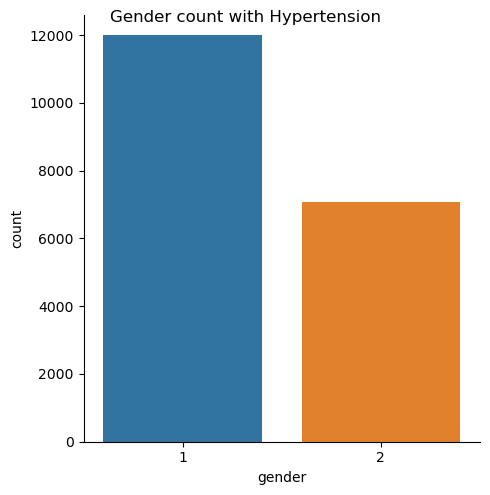

In [66]:
g=sns.catplot(x="gender", data=hypertension, kind="count")
g.fig.suptitle("Gender count with Hypertension")
plt.show

- it can be observed that more women `1` have hypertension than men `2`

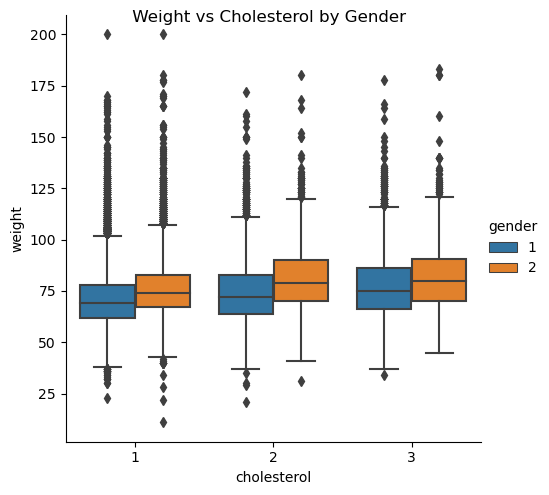

In [27]:
# Create a boxlot of Weight vs Cholesterol by Gender
g=sns.catplot(x="cholesterol", y="weight", kind="box", data=cardio_df, hue="gender")
g.fig.suptitle(" Weight vs Cholesterol by Gender")
plt.show()

In [28]:
cardio_df["cholesterol"].corr(cardio_df["weight"])

0.14063634329014343

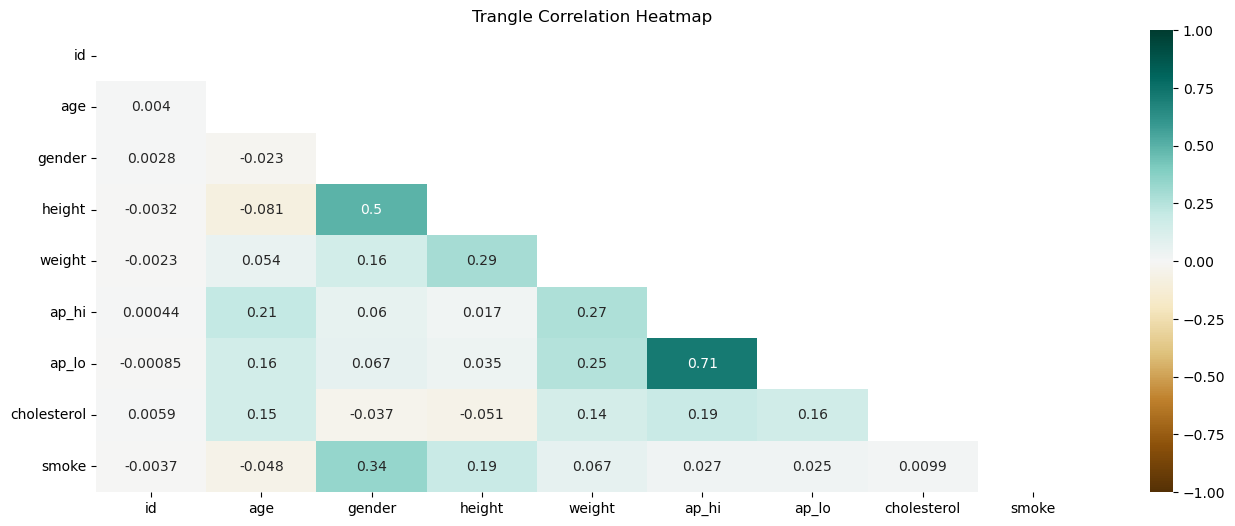

In [29]:
# create a heatmap of dataset showing correlation between pair columns
plt.figure(figsize=(16,6))
mask=np.triu(np.ones_like(cardio_df.corr(),dtype=bool))
heatmap = sns.heatmap(cardio_df.corr(),mask=mask, vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Trangle Correlation Heatmap')
plt.show()

* There is a strong positive correlation of 0.71 between `ap_hi` and `ap_lo`
* There is a strong positive correlation of 0.5 between `height` and `gender`
* There is a positive correlation of 0.34 between `smoke` and `gender` 

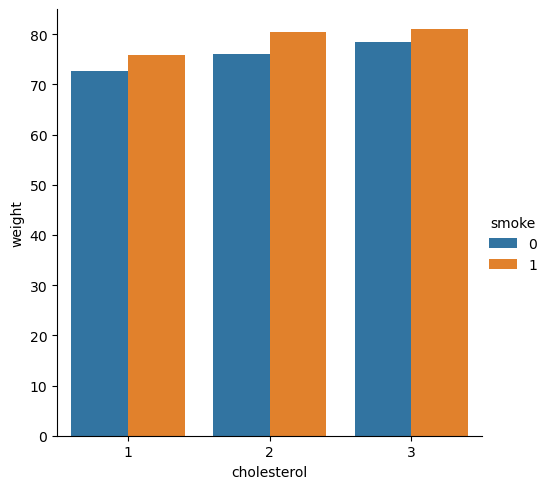

In [30]:
sns.catplot(x="cholesterol", y="weight", kind="bar", data=cardio_df, hue="smoke", ci=None)
plt.show()

- we can observe that as `cholesterol` level increases so does their corresponding weight for both smokers and non-smokers
- generally smokers tend to have higher weight compared to non-smokers

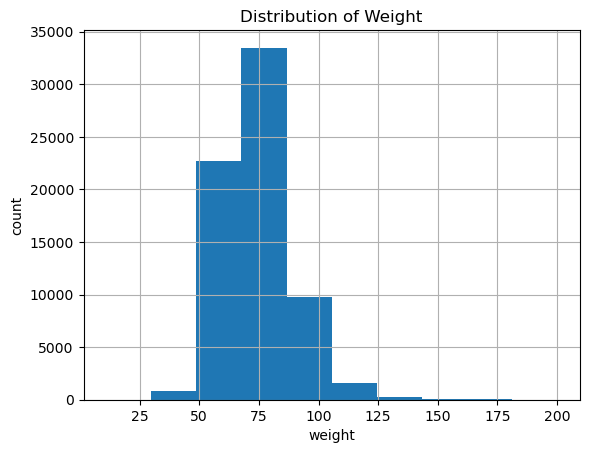

In [31]:
cardio_df["weight"].hist()
plt.title("Distribution of Weight")
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

In [32]:
# Calculated the average weight cardio dataset
avg_weight = cardio_df["weight"].mean()
avg_weight

74.10742110704976

In [33]:
# Calculate the median weight cardio datset
cardio_df["weight"].median()

72.0

In [34]:
# Calculate the minimum weight in the cardio dataset
min_weight = cardio_df["weight"].min()
print(f"The least weight within the dataset is {min_weight}kg which is unlikely for an adult")

The least weight within the dataset is 11.0kg which is unlikely for an adult


In [35]:
# Calculate the maximum weight in the cardio dataset
max_weight = cardio_df["weight"].max()
print(f"The maximum weigth within the dataset is {max_weight}kg")

The maximum weigth within the dataset is 200.0kg


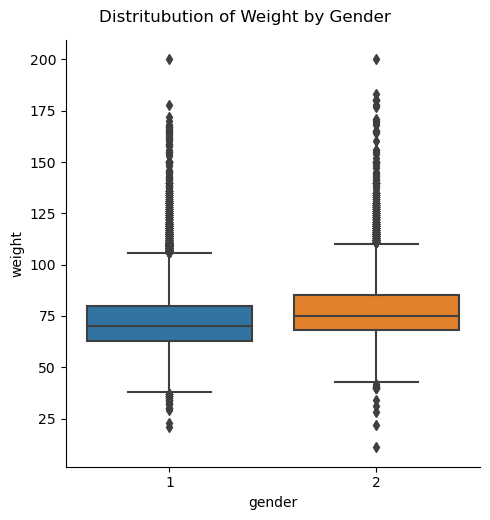

In [36]:
g = sns.catplot(y="weight", x="gender", data=cardio_df, kind="box")
g.fig.suptitle("Distritubution of Weight by Gender", y=1.03)
plt.show()

* It can be observed that the median weight of men `2` weighs more than women `1` 

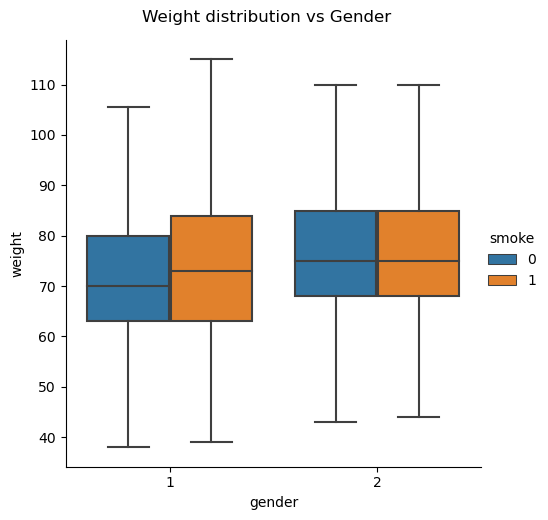

In [37]:
# show the weight distribution by gender 
g=sns.catplot(x="gender", y="weight", data=cardio_df, kind="box", hue="smoke", sym="")
g.fig.suptitle("Weight distribution vs Gender", y=1.03)
plt.show()

* we can deduce that women who are smokers weigh more than those who do not smoke
* while there is an identical weight of men that are smokers and non-smokers

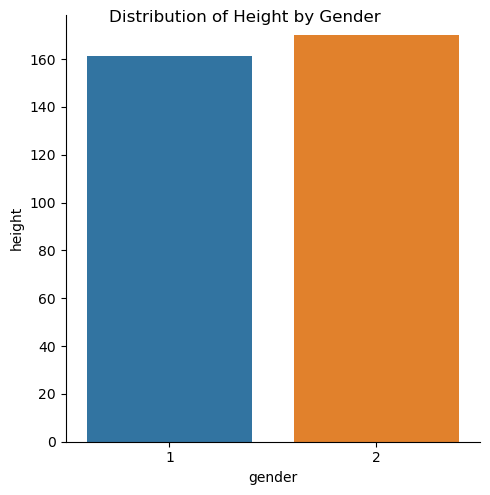

In [38]:
# Plot a bar chart of average height per gender 
g=sns.catplot(x="gender", y="height", data=cardio_df, kind="bar", ci=None)
g.fig.suptitle("Distribution of Height by Gender")
plt.show()

- It can be observed that `2`- male, is taller than `1`- female in this dataset 

Question 1
-----
* How much heavier is the age group with the highest average weight than the age group with the lowest weight?

In [39]:
# Calculate the average weight by age group
avg_weight_by_age = cardio_df.groupby("age")["weight"].mean().reset_index()
avg_weight_by_age.head()

,age,weight
0,29,70.000000
1,30,59.000000
2,39,72.111081
3,40,70.958831
4,41,72.731841


In [40]:
overall_avg_weight = cardio_df["weight"].mean()
print(f"The overall average weight of the dataset is {overall_avg_weight:.2f}kg.")

The overall average weight of the dataset is 74.11kg.


In [41]:
lowest_weight_age = avg_weight_by_age["age"].iloc[avg_weight_by_age["weight"].idxmin()]
lowest_weight_avg = avg_weight_by_age["weight"].min()
print(f"The age group with the lowest weight is ({lowest_weight_age}years) at {lowest_weight_avg}kg.")

The age group with the lowest weight is (30years) at 59.0kg.


In [42]:
highest_weight_age = avg_weight_by_age["age"].iloc[avg_weight_by_age["weight"].idxmax()]
highest_weight_avg = avg_weight_by_age["weight"].max()
print(f"The highest weight age group is ({highest_weight_age}years) at {highest_weight_avg:.2f}kg.")

The highest weight age group is (63years) at 75.71kg.


In [43]:
weight_difference = avg_weight_by_age["weight"].max()- avg_weight_by_age["weight"].min()
print(f"The age group with the highest weight ({highest_weight_age} years) is {weight_difference:.2f}kg heavier than the age group with the lowest weight({lowest_weight_age} years).")

The age group with the highest weight (63 years) is 16.71kg heavier than the age group with the lowest weight(30 years).


In [44]:
# Calculate the percentage differrence
percentage_difference = abs(highest_weight_avg - lowest_weight_avg) / overall_avg_weight * 100
print(f"The age group with the highest average weight ({highest_weight_age}years) is {percentage_difference: .2f}% heavier than the age group with the lowest weight({lowest_weight_age}years).")

The age group with the highest average weight (63years) is  22.55% heavier than the age group with the lowest weight(30years).


## Question 2

* Are men more likely to be a smoker than women?

In [45]:
# Calculate the percentage of men who smoke
men_smokers = cardio_df[cardio_df["gender"]==2]["smoke"].mean()*100

# Calculate the percentage of women who smoke
women_smokers = cardio_df[cardio_df["gender"]==1]["smoke"].mean()*100

In [46]:
if men_smokers > women_smokers:
    print(f"Yes, men are {men_smokers/ women_smokers:.0f}x more likely to be smokers.")
elif men_smokers < women_smokers:
    print(f"No, women are {women_smokers / men_smokers:.0f}x more likely to be smokers.")
else:
    print(f"The portion of men and women who smoke are about th same.")

Yes, men are 12x more likely to be smokers.


## Question 3
* How tall are the tallest 1% of people?

In [47]:
# Calculate the height percentiledistribution
height_percentiles = np.percentile(cardio_df["height"],  q=np.arange(0, 101,1))

# Calculate the height value that corresponds to the top 1% of the distribution
top_1_percentile = height_percentiles[99]
print(f"The height of the tallest 1% of people is taller than {top_1_percentile:.0f}cm.")

The height of the tallest 1% of people is taller than 184cm.


 Importing a new dataset to update the Cardio_dataset with an additional column
-------
The new dataset `Cardio_alco` consist of ONLY two columns, they are :

`id`- the unique key for each correspondent

`alco`- is a binary class for those who consume alcohol and those who doesn't.
* 0- no
* 1- yes

In [48]:
alco_df = pd.read_csv("cardio_alco.csv")
alco_df.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [49]:
alco_df.shape

(56903, 2)

In [50]:
alco_df["alco"].unique()

array([0, 1], dtype=int64)

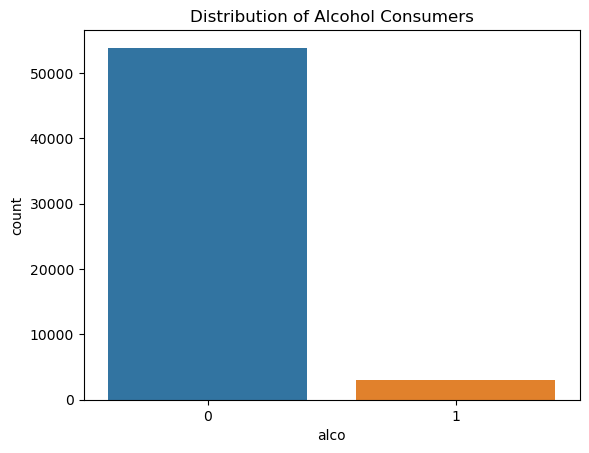

In [51]:
g=sns.countplot(x="alco", data=alco_df)
g.set_title("Distribution of Alcohol Consumers")
plt.show()

* The dataset consist more of people who do not consume alcohol `0` than those who do `1`

In [52]:
# merge the Cardio dataset with alco on `id`
merge = cardio_df.merge(alco_df, on="id", how="inner")

In [53]:
merge.shape

(55806, 10)

In [54]:
merge.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,39,1,159,60.0,110,70,1,0,0
1,45,56,1,160,73.0,130,85,1,0,0
2,46,60,2,173,82.0,140,90,3,0,0
3,47,55,1,163,55.0,120,80,1,0,0
4,49,50,2,175,95.0,120,80,1,0,0


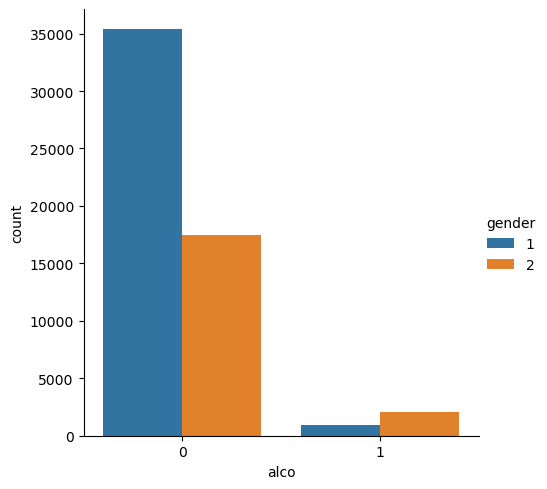

In [55]:
# Let's check what gender consume alcohol more
sns.catplot(x="alco", data=merge, kind="count", hue="gender")
plt.show()

* We can observe that most people do not consume alcohol
* Men `2` consume alcohol more than women `1`
* And a higher percent of women `1` do not drink alcohol

## Question 4
- What age group consume alcohol the most?

In [56]:
# examine what age group consume alco the most
alco_consumers = merge[merge["alco"]==1]
alco_consumers.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
30,81,55,2,187,115.0,130,90,1,0,1
67,134,47,1,167,71.0,120,80,2,0,1
69,136,51,1,167,80.0,190,90,2,0,1
75,142,39,2,164,48.0,110,70,1,1,1
102,180,58,2,174,90.0,140,80,1,1,1


<AxesSubplot:xlabel='age,alco'>

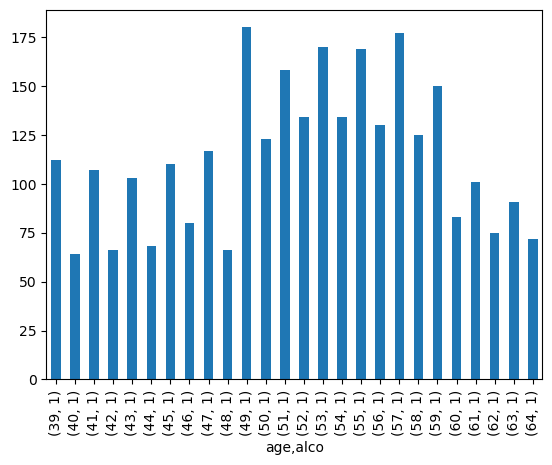

In [57]:
alco_consumers.groupby("age")["alco"].value_counts().plot(kind="bar")

- [x] Age groups `49`, `57`, `53` and `55` consume alcohol the most

## Question 5
* What is the percentage of people above 50 that consume alcohol?

In [58]:
# Create a subset of people above age 50
over_50 = merge[merge["age"] > 50]
len(over_50)

36110

In [59]:
# Number of people above 50 that consume alcohol
num_alco_consumer = over_50["alco"].sum()
print(f"The number of people that at 50 and above that consume alcohol are:",num_alco_consumer)

The number of people that at 50 and above that consume alcohol are: 1769


In [60]:
# Percent of people above 50 that consume alcohol
pct_alco_consumers = num_alco_consumer / len(over_50) * 100
print(f"The percentage of people above at 50years and above that consume alcohol is {pct_alco_consumers:.2f}%")

The percentage of people above at 50years and above that consume alcohol is 4.90%


## Question 6
* Which of the following statements is true with 95% confidence?
1. smokers have higher blood pressure than non_smokers
2. smokers have higher cholesterol level than non smokers

In [61]:
# Subset data for smokers and non-smokers
smokers_bp = merge.loc[merge['smoke'] == 1, 'ap_hi']
non_smokers_bp = merge.loc[merge['smoke'] == 0, 'ap_hi']

smokers_chol = merge.loc[merge['smoke'] == 1, 'cholesterol']
non_smokers_chol = merge.loc[merge['smoke'] == 0, 'cholesterol']


In [62]:
# perform two-sample t-test for blood pressure
t_stat, p_val_bp = stats.ttest_ind(smokers_bp, non_smokers_bp)
print('p-value for blood pressure:', p_val_bp)
if p_val_bp < 0.05:
    print('Smokers have significantly higher blood pressure than non-smokers')
else:
    print('There is no significant difference in blood pressure between smokers and non-smokers')

# perform two-sample t-test for cholesterol
t_stat, p_val_chol = stats.ttest_ind(smokers_chol, non_smokers_chol)
print('p-value for cholesterol:', p_val_chol)
if p_val_chol < 0.05:
    print('Smokers have significantly higher cholesterol levels than non-smokers')
else:
    print('There is no significant difference in cholesterol levels between smokers and non-smokers')


p-value for blood pressure: 2.6340244885541183e-10
Smokers have significantly higher blood pressure than non-smokers
p-value for cholesterol: 0.014608209105406687
Smokers have significantly higher cholesterol levels than non-smokers
